In [ ]:
QUESTION---



Enter the opertion you want to perform: MINIMIZE/MAXIMIZE
MINIMIZE
Enter the main function:

x=20
y=10

Enter the equation 1  :
x=1
y=2
constant=40
expression=leq

Enter the equation 2  :
x=3
y=1
constant=30
expression=geq

Enter the equation 3  :
x=4
y=3
constant=60
expression=geq


 Ans:

Optimal feasible region
Extreme point: ( 40.0 , 0 )  Value: 800.0
Extreme point: ( 15.0 , 0 )  Value: 300.0
Extreme point: ( 4.0 , 18.0 )  Value: 260.0
Extreme point: ( 6.0 , 12.0 )  Value: 240.0
Unique Minimal Solution
Minimum Solution: x= 6.0 ,y= 12.0 and Value= 240.0


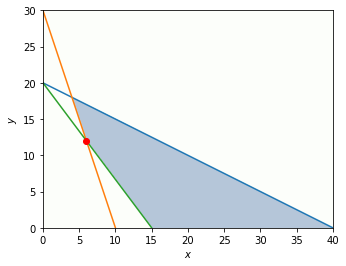

In [ ]:
# import the library pulp as p
import operator
import numpy as np
import matplotlib.pyplot as plt
from sys import exit
%matplotlib inline
import pulp as p

condition=input("Enter the opertion you want to perform: MINIMIZE/MAXIMIZE\n")
x1 = np.linspace(0, 40, 2000)

if(condition=="MINIMIZE"):
    # Create a LP Minimization problem
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)
else:
    Lp_prob = p.LpProblem('Problem', p.LpMaximize)

#Create problem Variables
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0

print("Enter the main function:\n")
x_c0=int(input("x="))
y_c0=int(input("y="))
cx=[]   #coefficients of x
cy=[]   #coefficients of y
cc=[]   #constant coefficients
ex=[]   #expression of the function

Lp_prob += x_c0 *x + y_c0 *y   #minimization function

for i in range(3):#taking the inputs
    print("\nEnter the equation",i+1," :")
    x_c=int(input("x="))
    y_c=int(input("y="))
    const=int(input("constant="))
    exp=input("expression=")

    cx.append(x_c)
    cy.append(y_c)
    cc.append(const)
    ex.append(exp)

    if(exp=="geq"):
        Lp_prob += x_c*x+y_c*y>=const   #expression

    if(exp=="leq"):
        Lp_prob += x_c*x + y_c*y<=const   #expression


#print(Lp_prob)
status = Lp_prob.solve()   # Solving the LPP
print("\n\n Ans:\n")
if(p.LpStatus[status]=="Optimal"):
    print("Optimal feasible region")   # The solution status
else:
    if((p.LpStatus[status]=="Unbounded" and condition=="MINIMIZE" and (x_c0<0 or y_c0<0) ) or
       (p.LpStatus[status]=="Unbounded" and condition=="MAXIMIZE" and (x_c0>0 or y_c0>0) ) or
       (p.LpStatus[status]=="Infeasible")):
        print("No solution")
        exit(0)
    print(p.LpStatus[status],"region")
x_ans=p.value(x)
y_ans=p.value(y)


pt=[]
for i in range(3):
    col=[]
    col.append(0)
    col.append(cc[i]/cy[i])
    pt.append(col)
    col=[]
    col.append(cc[i]/cx[i])
    col.append(0)
    pt.append(col)
    y1=(cc[i]-(cx[i]*x1))/cy[i]
    plt.plot(x1, y1, label=r'Equation')

plt.plot(p.value(x),p.value(y),'ro') #plotting the optimal solution point
plt.xlim((0, 40))
plt.ylim((0, 30))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


d = np.linspace(-2,40,300)
x,y = np.meshgrid(d,d)

#to plot the optimal region
plt.imshow((((y<=(cc[0]-(cx[0]*x))/cy[0]) if ex[0]=="leq" else (y>=(cc[0]-(cx[0]*x))/cy[0]))
              & ((y<=(cc[1]-(cx[1]*x))/cy[1]) if ex[1]=="leq" else (y>=(cc[1]-(cx[1]*x))/cy[1]))
              & ((y<=(cc[2]-(cx[2]*x))/cy[2]) if ex[2]=="leq" else (y>=(cc[2]-(cx[2]*x))/cy[2]))).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="GnBu", alpha = 0.3);   #plotting region


for i in range(3):
    col=[]
    b1=cc[i%3]/cy[i%3]
    b2=cc[(i+1)%3]/cy[(i+1)%3]
    m1=-cx[i%3]/cy[i%3]
    m2=-cx[(i+1)%3]/cy[(i+1)%3]
    xi = (b1-b2) / (m2-m1)
    yi = m1 * xi + b1
    col.append(xi)
    col.append(yi)
    pt.append(col)
#print(pt)

rows = len(pt)
final_pt=[]
j=0

#to find out the extreme points
for i in range(rows):
    f=0     #flag
    for j in range(3):
        if(ex[j]=="leq"):
            #print(cx[j]*pt[i][0] + cy[j]*pt[i][1], " > ",cc[j])
            if(cx[j]*pt[i][0] + cy[j]*pt[i][1]>cc[j]):
                f=f+1
                break

        else:
            #print(cx[j]*pt[i][0] + cy[j]*pt[i][1], " < ",cc[j])
            if(cx[j]*pt[i][0] + cy[j]*pt[i][1]<cc[j]):
                f=f+1
                break
    #print(f)
    if(f==0):
        f_pt=[]
        f_pt.append(pt[i][0])
        f_pt.append(pt[i][1])
        final_pt.append(f_pt)          #finding the points
#print(final_pt)

rows = len(final_pt)

m= x_c0*final_pt[0][0]+y_c0*final_pt[0][1]
sol=[]

for i in range(rows):
    val=x_c0*final_pt[i][0]+y_c0*final_pt[i][1]
    sol.append(val)
    print("Extreme point: (",final_pt[i][0],",",final_pt[i][1],")  Value:",val)  #to print the optimal value

a=0
row=len(sol)
for i in range(row):      #to check for the duplicate values
    k=i+1
    for j in range(k,row):
        if(sol[i]==sol[j]):
            a=1
            break;
    if(a==0):
        ans="Unique"
    else:
        ans="Duplicate"

#printing the solution
if(condition=="MINIMIZE"):
    print(ans+" Minimal Solution")
    print("Minimum Solution: x=",x_ans,",y=",y_ans,"and Value=", p.value(Lp_prob.objective))
else:
    print(ans+" Maximal Solution")
    print("Maximum Solution: x=",x_ans,",y=",y_ans,"and Value=",p.value(Lp_prob.objective))

#print("Objective: ",p.value(Lp_prob.objective))




